# How the renewable energy production has evolved in Spain?
Spain, the country I currently live in, has one of the highest amount of sunlight hours in Europe. Also, its continental climate grants strong winds and both factors combined give this country a great renewable energy production potential.
In this project, I would like to see if Spain is using this potential.

First things first: let's call the necessary Python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
!unzip ./Indicators.zip

Archive:  ./Indicators.zip
  inflating: Indicators.csv          


Let's read the indicators csv file and print the columns

In [5]:
os.getcwd()+os.sep
df = pd.read_csv(os.getcwd()+os.sep+'Indicators.csv')
df.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

Now let's extract the Electricity porduction from renewable sources

In [3]:
df_energy_production = df[df['IndicatorName']=='Electricity production from renewable sources, excluding hydroelectric (kWh)']

Creating the Spain and Europe dataframes in order to compare the Spanish renewable energy production with the rest of Europe


In [4]:
df_spain = df_energy_production.loc[df_energy_production['CountryName']=='Spain',['Year','Value']]
Europe = ['Italy','United Kingdom','Greece','Turkey','Germany','France','Portugal','Denmark','Finland','Sweden','Iceland']
df_avg = df_energy_production.groupby(['Year']).mean()
df_europe_avg = df_energy_production[df_energy_production['CountryName'].isin(Europe)].groupby(['Year']).mean()

df_to_plot = pd.merge(df_spain, df_europe_avg, on='Year',how='outer')

df_to_plot.columns = ['Year','Spain','Europe']

Generating the plot for graphical comparison

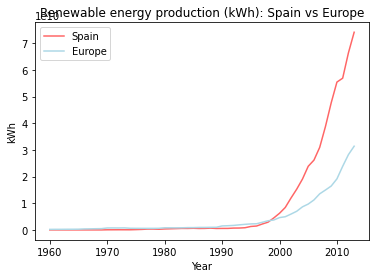

In [5]:
plt.plot('Year','Spain',data=df_to_plot,color='red',alpha=0.6)
plt.plot('Year','Europe',data=df_to_plot,color='lightblue')
plt.xlabel('Year')
plt.ylabel('kWh')
plt.title('Renewable energy production (kWh): Spain vs Europe')
plt.legend()
plt.show()

The plot shows how Spain is actually quite above the main european countries average renewable energy production. 
Now the question is: how this compares with its electric power consumption?

Since the electric power consumption is shown in kWh per capita, we have to multiply it by the population to make the energy consumption and renewable energy prodution comparable

In [6]:
df_spain_new = df[df['CountryName']=='Spain']
indicators_spain = ['Electric power consumption (kWh per capita)','Population, total']
df_spain_new = df_spain_new[df_spain_new['IndicatorName'].isin(indicators_spain)]
df_spain_electric_consumption = df_spain_new[df_spain_new['IndicatorName']=='Electric power consumption (kWh per capita)']
df_spain_population = df_spain_new[df_spain_new['IndicatorName']=='Population, total']
df_spain_new = pd.merge(df_spain_electric_consumption,df_spain_population,on='Year',how='outer')
df_spain_new = df_spain_new[['Year','Value_x','Value_y']]
df_spain_new.columns = ['Year','Electric power consumption (kWh per capita)','Population, total']
df_spain_new['Electric power consumption (kWh)'] = df_spain_new['Electric power consumption (kWh per capita)']*df_spain_new['Population, total']

df_spain_to_plot = pd.merge(df_spain,df_spain_new[['Year','Electric power consumption (kWh)']],on='Year',how='outer')
df_spain_to_plot.columns = ['Year','Electricity production from renewable sources, excluding hydroelectric (kWh)','Electric power consumption (kWh)']
df_spain_to_plot = df_spain_to_plot.dropna()

Now that we have the electric power consumption and renewable energy production for each year in the same dataframe, we can visualize the yearly evolution of both indicators.

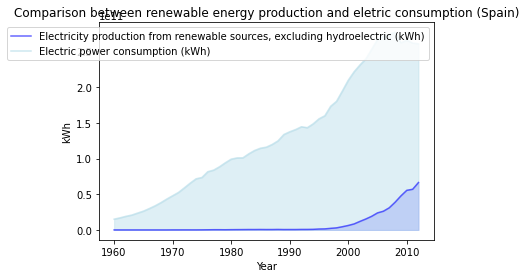

In [7]:
plt.fill_between('Year',df_spain_to_plot.columns[1],data=df_spain_to_plot,color='blue',alpha=0.2)
plt.plot('Year',df_spain_to_plot.columns[1],data=df_spain_to_plot,color='blue',alpha=0.6)
plt.fill_between('Year',df_spain_to_plot.columns[2],data=df_spain_to_plot,color='lightblue',alpha=0.4)
plt.plot('Year',df_spain_to_plot.columns[2],data=df_spain_to_plot,color='lightblue',alpha=0.6)
plt.xlabel('Year')
plt.ylabel('kWh')
plt.title('Comparison between renewable energy production and eletric consumption (Spain)')
plt.legend()
plt.show()

Although Spain has notably increased its renewable electric production, it is still quite far from satisfying the country's energy needs. Still, it is worth checking the yearly evolution of the percentage of electric consumption covered by renewable energy.

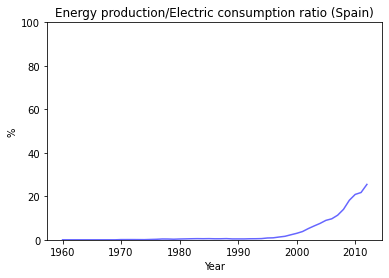

In [8]:
df_spain_to_plot['production_consumption_ratio'] = df_spain_to_plot['Electricity production from renewable sources, excluding hydroelectric (kWh)']/df_spain_to_plot['Electric power consumption (kWh)']*100

plt.plot('Year','production_consumption_ratio',data=df_spain_to_plot,color='blue',alpha=0.6)
plt.xlabel('Year')
plt.ylabel('%')
plt.ylim(0,100)
plt.title('Energy production/Electric consumption ratio (Spain)')
plt.show()

We can see that the electric consumption in Spain is growing at a slower rate than the renewable energy production, which can be defined as a positive trend.